In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

from matplotlib import pyplot as plt
from dotenv import load_dotenv

from models.linear_regressions import Linear_reg

load_dotenv()
sns.color_palette('colorblind')
plt.style.use('Solarize_Light2')

# Setting default DPI, pulling it from dotenv if it exists, setting it on 100 if not

pc_dpi = int(os.getenv('DPI'))

if pc_dpi is None:
    pc_dpi = 100


In [2]:
file = file_ghg_eui = "./data/seattle_predict_ghg_eui.csv"


In [3]:
df_model = pd.read_csv(file_ghg_eui).astype(float)

df_model.columns


Index(['OSEBuildingID', 'scaled_Electricity(kWh)',
       'scaled_GHGEmissionsIntensity(kgCO2e/ft2)',
       'scaled_PropertyArea(SquareMetre)Total', 'scaled_SourceEUI(kWh/m2)',
       'scaled_NaturalGas(kWh)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'ENERGYSTARScore', 'Building_proportion',
       'Parking_proportion', 'target_SourceEUI(kWh/m2)',
       'target_GHGEmissionsIntensity(kgCO2e/ft2)', 'ohe_nbhood_BALLARD',
       'ohe_nbhood_CENTRAL', 'ohe_nbhood_DELRIDGE', 'ohe_nbhood_DOWNTOWN',
       'ohe_nbhood_EAST', 'ohe_nbhood_GREATER DUWAMISH',
       'ohe_nbhood_LAKE UNION', 'ohe_nbhood_MAGNOLIA / QUEEN ANNE',
       'ohe_nbhood_NORTH', 'ohe_nbhood_NORTHEAST', 'ohe_nbhood_NORTHWEST',
       'ohe_nbhood_SOUTHEAST', 'ohe_nbhood_SOUTHWEST', 'ohe_ptype_Hospital',
       'ohe_ptype_Hotel', 'ohe_ptype_K-12 School', 'ohe_ptype_Large Office',
       'ohe_ptype_Mixed Use Property', 'ohe_ptype_Office', 'ohe_ptype_Other',
       'ohe_ptype_Refrigerated Warehouse', 'ohe_pty

In [4]:
# Target_1 : target_GHGEmissionsIntensity(kgCO2e/ft2) : two cols

droplist_1 = [
    "scaled_GHGEmissionsIntensity(kgCO2e/ft2)",  # Scaled target
    "target_SourceEUI(kWh/m2)"  # not to scale
    ]

df_model_ghg = df_model.drop(columns=droplist_1)


In [5]:
ghg_model = Linear_reg(dataframe=df_model_ghg, target="target_GHGEmissionsIntensity(kgCO2e/ft2)")


In [6]:
ghg_model.execute_all()


Step : Elastic Net


In [7]:
ghg_model.std_table


,RMSE,R2
Train,0.685693,0.744807
Test,0.569747,0.434463


In [8]:
ghg_model.elnet_table


,RMSE,R2
Train,0.990664,0.738976
Test,0.615657,0.443284


In [9]:
print(ghg_model.ridge_best_alpha)
ghg_model.ridge_table


22.250000000000007


,RMSE,R2
Train,0.672329,0.735566
Test,0.641198,0.448409


In [10]:
print(ghg_model.lasso_best_alpha)
ghg_model.lasso_table


0.03


,RMSE,R2
Train,0.684122,0.745840
Test,0.601429,0.432893


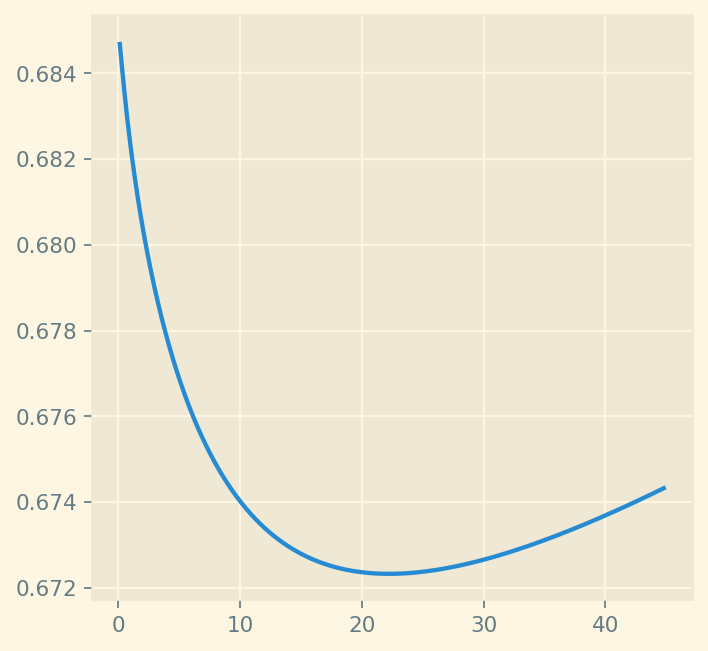

In [11]:
ghg_model.ridge_plot()

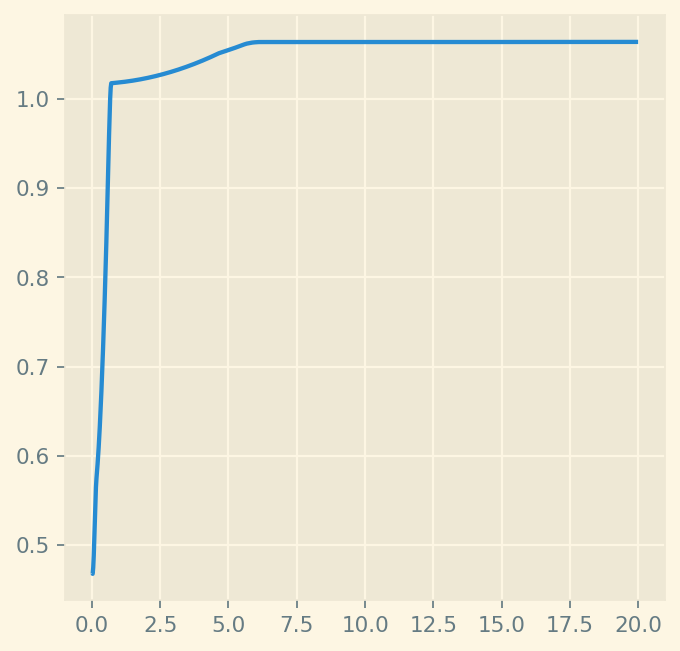

In [13]:
ghg_model.lasso_plot()

In [14]:
ghg_model.enet_best_l1_ratio


0.01

In [18]:
ghg_model.elnet_cv.alpha_

0.1